In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc
import matplotlib as mpl

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import requests
from PIL import Image

In [2]:
font_path = '../resources/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()

# '-' 출력 깨지는 거 방지
mpl.rcParams['axes.unicode_minus'] = False
rc('font', family=font_name)

# Word2Vec

In [16]:
embedding_model = Word2Vec.load('./data_token/book_token_word2Vec.model')

In [17]:
keywords = ['사랑', '우정', '꿈', '현실', '허무']

for keyword in keywords:
    sim_words = embedding_model.wv.most_similar(keyword, topn=10)
    print(keyword, "\n", sim_words)

사랑 
 [('사랑은', 0.7514970898628235), ('사랑으로', 0.7141029834747314), ('연인', 0.6150267124176025), ('우정', 0.6118912696838379), ('순수', 0.5991134643554688), ('갈구', 0.597068727016449), ('이별', 0.5889774560928345), ('애절', 0.5875186324119568), ('약희를', 0.5867823362350464), ('애틋', 0.5863896608352661)]
우정 
 [('사랑과', 0.7305378317832947), ('사랑', 0.6118913292884827), ('친구', 0.5683395862579346), ('우정은', 0.5675408840179443), ('워라밸에', 0.5651040077209473), ('애틋', 0.5476541519165039), ('배신', 0.5455005764961243), ('동희', 0.5398021936416626), ('쌍동이', 0.5378511548042297), ('남녀', 0.535624623298645)]
꿈 
 [('쓰바메의', 0.6786670684814453), ('꿈속', 0.6242449283599854), ('실현', 0.5919643640518188), ('원대', 0.5623909831047058), ('희망', 0.556791365146637), ('소망', 0.5531705021858215), ('장사의', 0.5527005195617676), ('나비의', 0.5371220111846924), ('좌절', 0.5166428685188293), ('카멜롯', 0.5079713463783264)]
현실 
 [('환상', 0.6364723443984985), ('부조리', 0.586449146270752), ('금형', 0.5858992338180542), ('모순', 0.5775171518325806), ('허구', 0.57236

In [18]:
embedding_model_2 = Word2Vec.load('./datasets/book_token_word2Vec.model')

In [20]:
keywords = ['사랑', '우정', '꿈', '현실', '허무']

for keyword in keywords:
    sim_words = embedding_model_2.wv.most_similar(keyword, topn=10)
    print(keyword, "\n", sim_words)

사랑 
 [('사랑은', 0.7639412879943848), ('사랑으로', 0.690253496170044), ('우정', 0.6311331391334534), ('연인', 0.6019852757453918), ('슬램덩크로', 0.5995944738388062), ('애정', 0.5954140424728394), ('애절', 0.584536612033844), ('순수', 0.5812188982963562), ('첫사랑', 0.5793821811676025), ('약희를', 0.5772255659103394)]
우정 
 [('사랑과', 0.7382802963256836), ('사랑', 0.6311330795288086), ('우정은', 0.5998868346214294), ('친구', 0.5765732526779175), ('애정', 0.5636294484138489), ('사랑으로', 0.5578958988189697), ('남녀', 0.557489812374115), ('애틋', 0.5425035953521729), ('우애', 0.5409553647041321), ('쌍동이', 0.5392051935195923)]
꿈 
 [('쓰바메의', 0.6229491233825684), ('실현', 0.6030244827270508), ('꿈속', 0.5891273617744446), ('희망', 0.5826621055603027), ('원대', 0.5399916172027588), ('나비의', 0.5237977504730225), ('장사의', 0.5230541229248047), ('소망', 0.5184758305549622), ('열망', 0.5172289609909058), ('좌절', 0.5128651857376099)]
현실 
 [('환상', 0.6078118681907654), ('고생대', 0.594916582107544), ('허구', 0.5811958909034729), ('부조리', 0.5674631595611572), ('리얼리즘', 0

               x           y
word                        
실재    180.004456   50.082218
현실   -155.962051  125.648491
사실     41.745384 -241.259308
혼융    -43.273540   27.358747
빈틈    194.619553 -149.265625
경계   -206.261642  -47.963047
실제     42.038631  154.307343
크레메르   74.270531  -59.533752
가상    -59.963249 -118.055725
팩션   -153.102478 -233.360306
허구      0.000000    0.000000


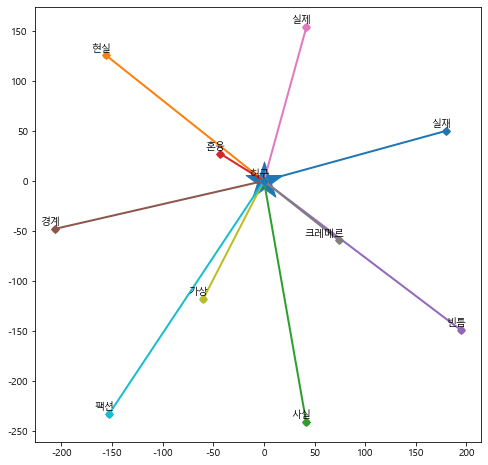

In [5]:
keyword = '허구'
sim_words = embedding_model.wv.most_similar(keyword, topn=10)

labels = []
vectors = []
for word, _ in sim_words:
    labels.append(word)
    vectors.append(embedding_model.wv[word])

df_vector = pd.DataFrame(vectors)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
n_vectors = tsne_model.fit_transform(df_vector)

df_xy = pd.DataFrame({'word': labels, 'x': n_vectors[:, 0], 'y': n_vectors[:, 1]}).set_index('word')
df_xy.loc[keyword] = (0, 0)
print(df_xy)

plt.figure(figsize=(8, 8))

plt.scatter(0, 0, s=1500, marker='*')
for word in df_xy.index:
    x, y = df_xy.loc[word]
    plt.plot([0, x], [0, y], '-D', linewidth=2)
    plt.scatter(x, y)
    plt.annotate(word, xytext=(5, 2), xy=(x, y), textcoords='offset points', 
                 ha='right', va='bottom')
plt.show()

# Tfidf

In [6]:
df_book = pd.read_csv('./data_token/book_keyword.csv', index_col=0)

In [8]:
Tfidf = TfidfVectorizer(sublinear_tf=True)
Tfidf_matrix = Tfidf.fit_transform(df_book['info'])

In [11]:
book_code = 90051766   # 57765632 11592349 89960056 89960055
idx = df_book.index.get_loc(book_code)
print(idx, df_book.loc[book_code]['title'])

# cosine 유사도 계산
cosine_sim = linear_kernel(Tfidf_matrix[idx], Tfidf_matrix)

# cosine 유사도가 높은 순으로 정렬
sim_scores = pd.Series(cosine_sim[-1], index=df_book.index)
sim_scores.sort_values(ascending=False, inplace=True)

# 자기 자신을 제외하고 가장 유사한 책 추출
rec_codes = sim_scores.index[0:10]
if book_code in rec_codes:
    rec_codes = rec_codes.drop([book_code])
else:
    rec_codes = rec_codes[:-1]

print(sim_scores[0:10])

rec_books = df_book.loc[rec_codes]
rec_books[['title', 'info']]

6555 달러구트 꿈 백화점 : 잠들어야만 입장 가능합니다
code
90051766    1.000000
19898006    0.131963
61786823    0.131610
25248722    0.115102
25848952    0.114317
8699304     0.114259
79259878    0.112435
67031568    0.111720
96556555    0.110495
57765632    0.107665
dtype: float64


,title,info
code,,
19898006,마음을 읽는 고양이 프루던스의 러브 인 뉴욕 - 샘터 외국소설선 011,책 소개 인간 이상해 털이 따뜻 텐 화 인간 이상해 속 서로 생각 고양이 생각 궁금...
61786823,이 거짓말이 들통나기 전에,일본 개봉 화제작 커피 식기 전 원작 소설 이야기 본 시리즈 판매 부 돌파 한적 일...
25248722,내 친구 구미호,우연 기회 인간 세계로 구미호 페니 난관 친구 우정 페니 구미호 세계로 과학 수학 ...
25848952,생명의 나무 - SciFan 제18권,진열 분야 소설 환타 소설 영미 소설 책 소개 러브크래프트가 스페이스 오페라 화성 ...
8699304,막다른 골목의 추억,바나나 사랑 소설 지금 작품 요시모토 바나나 요시모토 바나나 따스 힐링 메시지 서로...
79259878,엘리너 올리펀트는 완전 괜찮아,괴짜 외톨이 엘리너 완전 사랑 리즈 위 더 스푼 법 법 엘리너 리펀 엘리너 삶 완전...
67031568,삼사라,어 워드 연속 본상 수상 한국 자존심 한국 최전선 작가 데뷔작 별 수상작 우주 유원...
96556555,도로나 이별 사무실,연인 직장 상사 습관 지긋지긋 대신 이별 가족 또래집단 삶 섬세 관계 망 예리 포착...
57765632,"그 시절, 우리가 좋아했던 소녀",누 군가 때 몸 빛 사람 인해 자신 거지 동안 간직 첫사랑 영화로 대만 영화 시절 ...


In [7]:
df_book_2 = pd.read_csv('./datasets/book_token.csv', index_col=0)

In [21]:
Tfidf_2 = TfidfVectorizer(sublinear_tf=True)
Tfidf_matrix_2 = Tfidf_2.fit_transform(df_book_2['info'])

In [22]:
book_code = 90051766   # 57765632 11592349 89960056 89960055
idx = df_book_2.index.get_loc(book_code)
print(idx, df_book_2.loc[book_code]['title'])

# cosine 유사도 계산
cosine_sim = linear_kernel(Tfidf_matrix_2[idx], Tfidf_matrix_2)

# cosine 유사도가 높은 순으로 정렬
sim_scores = pd.Series(cosine_sim[-1], index=df_book_2.index)
sim_scores.sort_values(ascending=False, inplace=True)

# 자기 자신을 제외하고 가장 유사한 책 추출
rec_codes = sim_scores.index[0:10]
if book_code in rec_codes:
    rec_codes = rec_codes.drop([book_code])
else:
    rec_codes = rec_codes[:-1]

print(sim_scores[0:10])

rec_books = df_book_2.loc[rec_codes]
rec_books[['title', 'info']]

7189 달러구트 꿈 백화점 : 잠들어야만 입장 가능합니다
code
90051766    1.000000
19898006    0.133817
61786823    0.129825
8699304     0.115615
25248722    0.113459
25848952    0.111236
96556555    0.111100
67031568    0.110927
77184742    0.108703
79259878    0.108664
dtype: float64


,title,info
code,,
19898006,마음을 읽는 고양이 프루던스의 러브 인 뉴욕 - 샘터 외국소설선 011,책 소개 인간 이상 털이 따뜻 텐 화 인간 이상 속 서로 생각 고양이 생각 궁금 사...
61786823,이 거짓말이 들통나기 전에,일본 개봉 화제작 커피 식기 전 원작 소설 이야기 본시리즈 판매 부 돌파 한적 일본...
8699304,막다른 골목의 추억,바나나 사랑 소설 지금 작품 요시모토바나나 요시모토바나나 따스 힐링 메시지 눈 골목...
25248722,내 친구 구미호,우연 기회 인간 세계로 구미호 페니 난관 친구 우정 페니 구미호 세계로 과학 수학 ...
25848952,생명의 나무 - SciFan 제18권,진열 분야 소설 환타 소설 영미 소설 책 소개 러브크래프트가 스페이스오페라 화성 지...
96556555,도로나 이별 사무실,연인 직장 상사 습관 지긋지긋 대신 이별 가족 또래집단 삶 섬세 관계 망 예리 포착...
67031568,삼사라,어 워드 연속 본상 수상 빛나 한국 자존심 한국 최전선 작가 데뷔작 별 수상작 우주...
77184742,커피가 식기 전에,한적 일본 도시 골목길 지하 찻집 한여름 서늘 기운 수상 찻집 쿠 리 쿠 찻집 자리...
79259878,엘리너 올리펀트는 완전 괜찮아,괴짜 외톨이 엘리너 완전 사랑 리즈 위 더 스푼 법 법 엘리너 올리펀트 엘리너 삶 ...


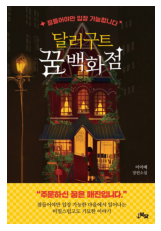

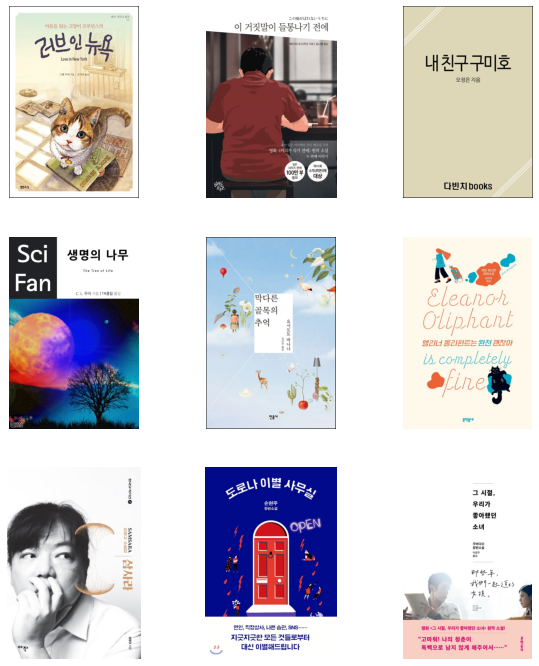

In [12]:
rec_books = df_book.loc[rec_codes][['title', 'img']]

image = Image.open(requests.get(df_book.loc[book_code]['img'], stream=True).raw)
plt.imshow(image)
plt.axis('off')
plt.show()


fig = plt.figure(figsize=(10, 12))  # 그래프들을 그릴 곳
axes = [fig.add_subplot(3, 3, i) for i in range(1, 10)]

for idx, code in enumerate(rec_books.index):
    title, img = rec_books.loc[code]
    
    image = Image.open(requests.get(img, stream=True).raw)
    
    axes[idx].imshow(image)
    axes[idx].set_xlabel(title)
    axes[idx].axis('off')
    
plt.show()

In [48]:
keyword = '학교'
sim_words = embedding_model.wv.most_similar(keyword, topn=10)
print(sim_words)

sentence = [keyword] * 10
for word, cosine in sim_words:
    sentence.extend([word] * round(cosine * 10))

# cosine 유사도 계산
cosine_sim = linear_kernel(Tfidf_2.transform(sentence), Tfidf_matrix_2)

# cosine 유사도가 높은 순으로 정렬
sim_scores = pd.Series(cosine_sim[-1], index=df_book_2.index)
sim_scores.sort_values(ascending=False, inplace=True)

# 가장 유사한 책 추출
rec_codes = sim_scores.index[:10]
print(sim_scores[:10])

rec_books = df_book_2.loc[rec_codes]
print(rec_books[['title', 'info']])

[('학생', 0.7554595470428467), ('입학', 0.7198323011398315), ('교실', 0.6629507541656494), ('교사', 0.6576603055000305), ('중학교', 0.6528587341308594), ('초등학교', 0.6520813703536987), ('기숙사', 0.6494061946868896), ('학년', 0.646203339099884), ('고등학교', 0.6445130109786987), ('전학', 0.6331415176391602)]
code
13201051    0.371338
67574119    0.267839
70982075    0.264973
11087935    0.254296
77259704    0.222389
72334146    0.203460
89741403    0.194205
58041368    0.189539
80457614    0.188969
91738646    0.158459
dtype: float64
                   title                                               info
code                                                                       
13201051      무법자 3 (완결)  고등학생 신분 폭력 조직 리드 희대 반항아 길동 차례 퇴학 전학 반복 서울 명문 혁...
67574119    왜 힘이 필요한지 알아  태백 태권도 장 이태백 관장 금 선녀 사범 아들 태백 도장 운영 가난 부모 생계 태...
70982075     안녕하세요 양구입니다  전학 첫날 학교 일 심상 엄마 태국 출신 앙코르와트 러시아인 불곰 별명 방 후 옥상...
11087935        일주일이라는 꿈  전 위험 속 친구 하루 마음 지민 부모 무관심 폭력 속 겉 속 생각 색 색깔 생각 ...
77259704  흉기는 부서진 검정의 절규  꿈 